## 4.10 Homework

Use [this notebook](homework-4-starter.ipynb) as a starter

We'll use the credit scoring dataset:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

## Preparation 

* Execute the preparation code from the starter notebook
* Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv')

In [10]:
df.head(4).T

,0,1,2,3
Status,1,1,2,1
Seniority,9,17,10,0
Home,1,1,2,1
Time,60,60,36,60
Age,30,58,46,24
Marital,2,3,2,1
Records,1,1,2,1
Job,3,1,3,1
Expenses,73,48,90,63
Income,129,131,200,182


In [11]:
df.columns = df.columns.str.lower()

##### Some of the features are encoded as numbers. Use the following code to de-code them: 

In [12]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

##### Prepare the numerical variables:

In [13]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

##### Remove clients with unknown default status

In [15]:
df = df[df.status != 'unk'].reset_index(drop=True)

##### Create the target variable 

In [16]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

##### What are the categorical variables? What are the numerical?

In [17]:
df.head(4).T

,0,1,2,3
seniority,9,17,10,0
home,rent,rent,owner,rent
time,60,60,36,60
age,30,58,46,24
marital,married,widow,married,single
records,no,no,yes,no
job,freelance,fixed,freelance,fixed
expenses,73,48,90,63
income,129,131,200,182
assets,0,0,3000,2500


In [35]:
df.columns= df.columns.str.lower().str.replace(' ','_')
cat_cols = list(df.dtypes[df.dtypes=='object'].index)
num_cols = list(df.dtypes[df.dtypes!='object'].index)
for ix in cat_cols:
    df[ix]= df[ix].str.lower().str.replace(' ','_')

In [19]:
df.dtypes

seniority     int64
home         object
time          int64
age           int64
marital      object
records      object
job          object
expenses      int64
income        int64
assets        int64
debt          int64
amount        int64
price         int64
default       int32
dtype: object

In [20]:
cat_cols

['home', 'marital', 'records', 'job']

In [36]:
num_cols

['seniority',
 'time',
 'age',
 'expenses',
 'income',
 'assets',
 'debt',
 'amount',
 'price',
 'default']

In [23]:
df.isnull().sum()

seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
default      0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.default.values
y_val = df_val.default.values
y_test = df_test.default.values

In [23]:
del df_train['default']
del df_val['default']
del df_test['default']

In [24]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

c:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
default_decision = (y_pred >= 0.5)
(y_val == default_decision).mean()

0.7519640852974186

In [26]:
len(y_val)

891

In [27]:
(y_val == default_decision).mean()

0.7519640852974186

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_val, y_pred >= 0.5)

0.7519640852974186

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the "default" variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.


Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [41]:
num_cols = ['seniority','time','income','debt']

In [92]:
for nc in num_cols:
    fpr, tpr, thresholds = roc_curve(y_train, df_train[nc].values)
    auc_score = auc(fpr, tpr)
    
    if auc_score < 0.5:
        fpr, tpr, thresholds = roc_curve(y_train, -df_train[nc].values)
        auc_score = auc(fpr, tpr)
    print('auc score for {} variable :{}'.format(nc,round(auc_score,3)))

auc score for seniority variable :0.702
auc score for time variable :0.561
auc score for income variable :0.687
auc score for debt variable :0.501


## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [46]:
features = ['seniority', 'income', 'assets', 'records', 'job', 'home']

dv = DictVectorizer(sparse=False)
train_dict = df_train[features].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[features].to_dict(orient='records')
X_val = dv.fit_transform(val_dict)

In [47]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [93]:
y_pred = model.predict_proba(X_val)[:,1]

## Question 2

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

In [51]:
# roc_auc_score(y_val, y_pred)
print("AUC of this model on the validation dataset : {}".format(round(roc_auc_score(y_val, y_pred), 3)))

AUC of this model on the validation dataset : 0.812


## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them


At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

In [52]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    
    scores.append((t, tp, fp, fn, tn, precision, recall))

<ipython-input-52-ae4ed4e2e01d>:18: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


In [54]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn', 'precision', 'recall']
df_scores = pd.DataFrame(scores, columns=columns)

In [60]:
df_scores.head(100)

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,246,645,0,0,0.276094,1.00000
1,0.01,246,635,0,10,0.279228,1.00000
2,0.02,244,613,2,32,0.284714,0.99187
3,0.03,242,593,4,52,0.289820,0.98374
4,0.04,242,563,4,82,0.300621,0.98374
...,...,...,...,...,...,...,...
95,0.95,0,0,246,645,NaN,0.00000
96,0.96,0,0,246,645,NaN,0.00000
97,0.97,0,0,246,645,NaN,0.00000
98,0.98,0,0,246,645,NaN,0.00000


Text(0, 0.5, 'Values')

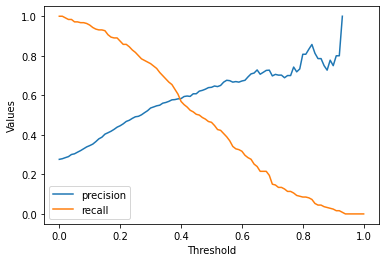

In [57]:
plt.plot(df_scores.threshold, df_scores['precision'], label='precision')
plt.plot(df_scores.threshold, df_scores['recall'], label='recall')
plt.legend()

plt.xlabel('Threshold')
plt.ylabel('Values')

In [72]:
df_scores[df_scores['threshold'].isin([0.2,0.4,0.6,0.8])]

,threshold,tp,fp,fn,tn,precision,recall,F1
20,0.2,215,267,31,378,0.446058,0.873984,0.590659
40,0.4,140,100,106,545,0.583333,0.569106,0.576132
60,0.6,78,38,168,607,0.672414,0.317073,0.430939
80,0.8,21,5,225,640,0.807692,0.085366,0.154412


## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

F1 = 2 * P * R / (P + R)

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

In [73]:
df_scores['F1'] = (2*df_scores['precision'] * df_scores['recall']) / (df_scores['precision'] + df_scores['recall'])

df_scores[df_scores['F1'] == df_scores.F1.max()]

,threshold,tp,fp,fn,tn,precision,recall,F1
30,0.3,187,162,59,483,0.535817,0.760163,0.628571


## Question 5

Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


How large is standard devidation of the AUC scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

In [74]:
def train(df_train, y_train, c=1.0):
    dicts = df_train.to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [75]:
def predict(df, dv, model):
    dicts = df.to_dict(orient='records')
    
    X = dv.transform(dicts)    
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [76]:
from sklearn.model_selection import KFold

In [77]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [78]:
scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.default.values
    y_val = df_val.default.values

    dv, model = train(df_train[features], y_train)
    y_pred = predict(df_val[features], dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print(f'{np.mean(scores):.4f} +- {np.std(scores):.4f}')

0.8122 +- 0.0137


In [81]:
round(np.mean(scores),3),round(np.std(scores),3)

(0.812, 0.014)

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Initialize `KFold` with the same parameters as previously
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

In [83]:
n_splits = 5

for C in [0.01, 0.1, 1, 10]:
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.default.values
        y_val = df_val.default.values

        dv, model = train(df_train[features], y_train, c=C)
        y_pred = predict(df_val[features], dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('When C={} then mean is {} & std is {}'.format(C, round(np.mean(scores),3),round(np.std(scores),3))

When C=0.01 then mean is 0.809 & std is 0.013
When C=0.1 then mean is 0.812 & std is 0.013
When C=1 then mean is 0.812 & std is 0.014
When C=10 then mean is 0.814 & std is 0.015
